<a href="https://colab.research.google.com/github/mrityunjay-singh-99/Deep_learing_CNN/blob/master/CNN_CIFR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10


In [ ]:
load_data=cifar10.load_data()

(train_image,train_labels),(test_image,test_labels)=load_data

train_image.shape,test_image.shape,train_labels.shape,test_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
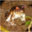

In [ ]:
train_image[0]

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
train_image=train_image/255.0
test_image=test_image/255.0

In [ ]:
min(train_labels),max(train_labels)

(array([0], dtype=uint8), array([9], dtype=uint8))

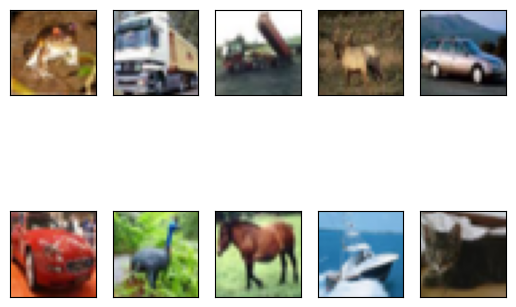

In [ ]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_image[i])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

plt.show()

In [ ]:
class_names=['frog','automobile','truck','dog','car','sport_car','pecock','horse','ship','truck']

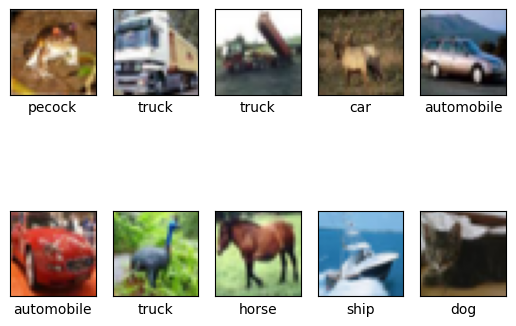

In [ ]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_image[i])
    #plt.ylabel(class_names[train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
model=Sequential()

#layer 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))

#layer 2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

#layer 3
model.add(Conv2D(64,(3,3),activation='relu'))

#input layer
model.add(Flatten())

#hidden layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

#output layer
model.add(Dense(10,activation='softmax'))

#model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198,186 (774.16 KB)

 Trainable params: 198,186 (774.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history1=model.fit(train_image,
                  train_labels,
                  epochs=20,
                  validation_data=(test_image,test_labels),
                  verbose=True)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2999 - loss: 1.8368 - val_accuracy: 0.5303 - val_loss: 1.2768
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.5522 - loss: 1.2451 - val_accuracy: 0.5903 - val_loss: 1.1587
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6218 - loss: 1.0573 - val_accuracy: 0.6393 - val_loss: 1.0336
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6745 - loss: 0.9313 - val_accuracy: 0.6560 - val_loss: 0.9742
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7001 - loss: 0.8449 - val_accuracy: 0.6882 - val_loss: 0.8906
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7225 - loss: 0.7819 - val_accuracy: 0.6759 - val_loss: 0.9427
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7465 - loss: 0.7182 - val_accuracy: 0.6881 - val_loss: 0.8956
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7644 - loss: 0.67

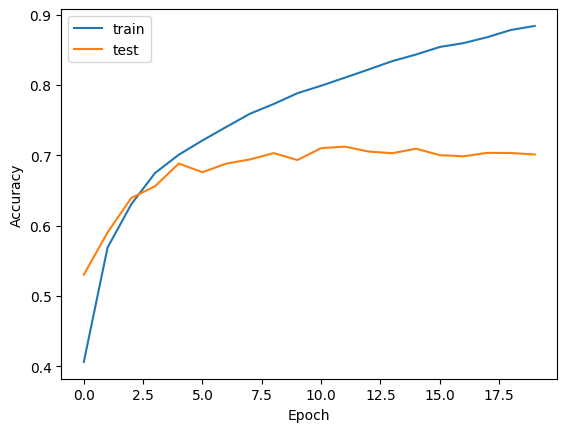

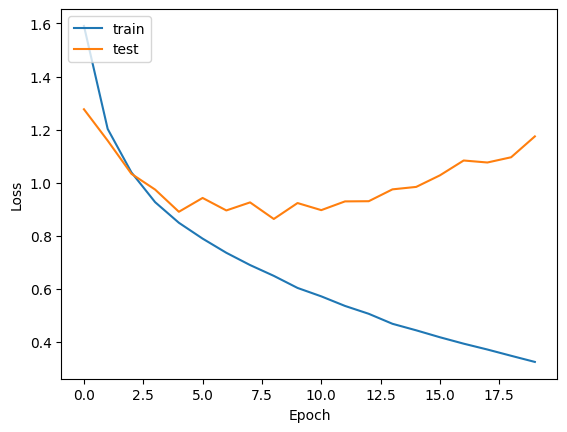

In [ ]:
plt.plot(history1.history['accuracy'],label='accuracy')
plt.plot(history1.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history1.history['loss'],label='loss')
plt.plot(history1.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:

test_loss,test_accuracy=model.evaluate(test_image,test_labels)
print('Test Loss:',test_loss)
print('Test Accuracy:',test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7040 - loss: 1.1670
Test Loss: 1.1745766401290894
Test Accuracy: 0.7010999917984009


In [ ]:
image_test_prediction=model.predict(test_image)
image_test_prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


array([[1.5646452e-04, 9.2781283e-06, 3.4940718e-03, ..., 1.0262990e-02,
        1.4473860e-04, 5.6133717e-06],
       [1.5168500e-04, 4.5870479e-02, 1.3687644e-07, ..., 1.5806239e-09,
        9.5383316e-01, 1.4435673e-04],
       [7.8308254e-02, 3.4109250e-02, 1.1645291e-02, ..., 1.7250370e-02,
        6.2831521e-01, 1.9084617e-01],
       ...,
       [3.2448105e-07, 4.7023457e-10, 1.4738749e-04, ..., 3.6735418e-03,
        2.0882000e-08, 3.2274443e-09],
       [7.4920595e-01, 2.4820064e-01, 1.4205909e-04, ..., 1.2530520e-05,
        7.2876857e-05, 5.3467858e-04],
       [1.1904940e-12, 5.8038379e-18, 1.4835189e-09, ..., 9.9932015e-01,
        1.8576764e-15, 1.0618257e-13]], dtype=float32)

In [ ]:
max=np.max(image_test_prediction[0])
index=np.argmax(image_test_prediction[0])
print(max,index)

0.7704492 5


In [ ]:
df=pd.DataFrame()
df["max_prob"]=[i for i in np.max(image_test_prediction,axis=1)]
df['index']=[np.argmax(i) for i in image_test_prediction]
df["actual_class"]=[class_names[i[0]] for i in test_labels]
df["pred_class"]=[class_names[i] for i in index]
df["correct_prediction"]=df["actual_class"]==df["pred_class"]

In [ ]:
df

,max_prob,index,actual_class,pred_class,correct_prediction
0,0.770449,5,dog,sport_car,False
1,0.953833,8,ship,ship,True
2,0.628315,8,ship,ship,True
3,0.852968,0,frog,frog,True
4,0.989466,6,pecock,pecock,True
...,...,...,...,...,...
9995,0.985149,3,ship,dog,False
9996,0.859417,5,dog,sport_car,False
9997,0.993981,5,sport_car,sport_car,True
9998,0.749206,0,automobile,frog,False
